In [1]:
from ip_analysis_tool.util.graph_getter import get_graph_by_date
from ip_analysis_tool.util.date_util import get_date_object
from ip_analysis_tool.accessibility_within_hops import accessibility_within_hops
from json import dump
import pandas as pd

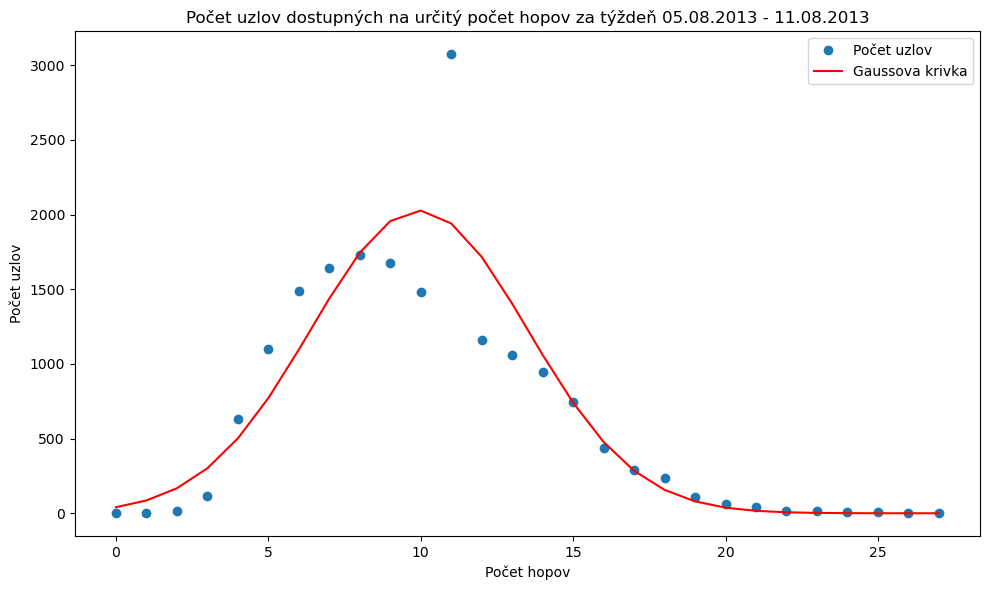

    distance  count  percentage  cumulative_count  cumulative_percentage  \
0          0      1    0.005530                 1               0.005530   
1          1      2    0.011061                 3               0.016591   
2          2     14    0.077425                17               0.094016   
3          3    113    0.624931               130               0.718947   
4          4    633    3.500719               763               4.219666   
5          5   1101    6.088928              1864              10.308594   
6          6   1487    8.223648              3351              18.532242   
7          7   1640    9.069793              4991              27.602035   
8          8   1729    9.561995              6720              37.164031   
9          9   1675    9.263356              8395              46.427386   
10        10   1482    8.195996              9877              54.623382   
11        11   3073   16.994801             12950              71.618184   
12        12

In [6]:
from ip_analysis_tool.trend_identification import gaussian_fit
from ip_analysis_tool.visualize.chart import visualize_chart_add_line
data = accessibility_within_hops(get_graph_by_date(get_date_object("2013-08-05")))
data = gaussian_fit(data, x_characteristic="distance", y_characteristic="count")
data.to_csv("scratchpad/accessibility_within_hops_2013-08-05.csv", index=False)
visualize_chart_add_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="gauss_fit",
    title="Počet uzlov dostupných na určitý počet hopov za týždeň 05.08.2013 - 11.08.2013",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Gaussova krivka",
)
print(data)

    distance  count  percentage  cumulative_count  cumulative_percentage  \
0          0      2    0.000633                 2               0.000633   
1          1   1099    0.347595              1101               0.348227   
2          2    585    0.185025              1686               0.533252   
3          3   1282    0.405474              2968               0.938727   
4          4  12894    4.078147             15862               5.016874   
5          5  14251    4.507342             30113               9.524216   
6          6  19701    6.231082             49814              15.755299   
7          7  25812    8.163885             75626              23.919183   
8          8  30532    9.656739            106158              33.575922   
9          9  30336    9.594747            136494              43.170669   
10        10  29096    9.202557            165590              52.373226   
11        11  28184    8.914107            193774              61.287333   
12        12

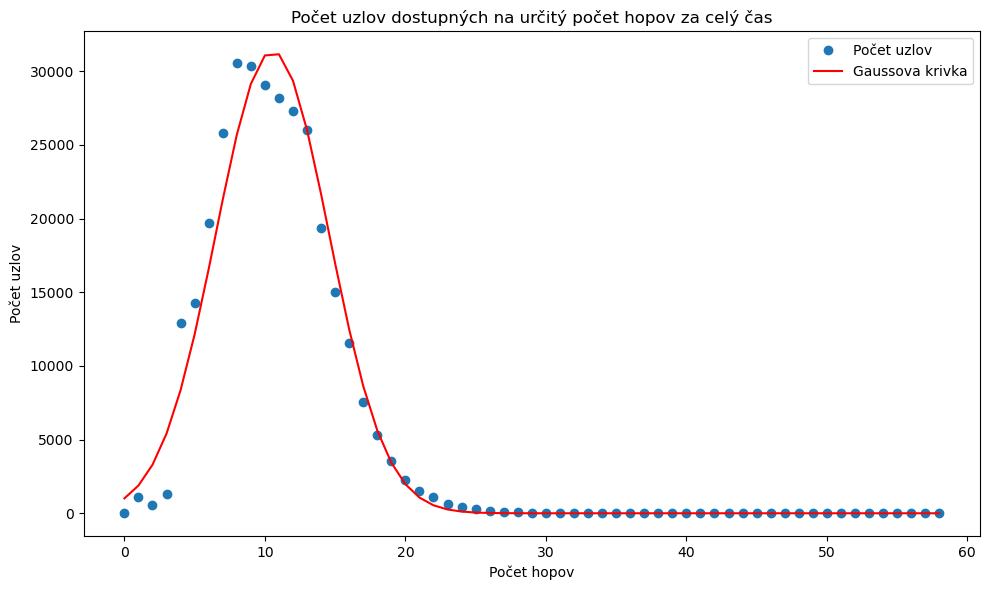

In [7]:
# Entire data range
from ip_analysis_tool.visualize.chart import visualize_chart_add_line
from ip_analysis_tool.enums import TimeInterval
from ip_analysis_tool.trend_identification import gaussian_fit
data = accessibility_within_hops(get_graph_by_date(time_interval=TimeInterval.ALL))
data = gaussian_fit(data, x_characteristic="distance", y_characteristic="count")
print(data)
data.to_csv("scratchpad/accessibility_within_hops_all.csv", index=False)
visualize_chart_add_line(
    data=data,
    x_characteristic="distance",
    y_characteristic="count",
    y_line_characteristic="gauss_fit",
    title="Počet uzlov dostupných na určitý počet hopov za celý čas",
    x_label="Počet hopov",
    y_label="Počet uzlov",
    y_line_label="Gaussova krivka",
)